# How-to: Run verbatim circuits

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

from qiskit_braket_provider import BraketProvider

Some AWS backends support running circuits using verbatim mode and/or with disabled qubit rewiring. If you are not familiar with those concepts, refer to the [documentation](https://aws.amazon.com/about-aws/whats-new/2021/09/amazon-braket-verbatim-compilation-quantum-circuits/), here we'll constrain ourselves to a short reminder:

- `verbatim box` is a part of the circuit that *will not* be compiled by Braket. Hence, it needs to comprise only gates that are native to particular device.
- `qubit rewiring` is a process in which logical qubits in submitted circuits are mapped into concrete physical qubits on actual device.

Typically, one wants to design circuits using high-level concepts, without worrying about qubit placement or gate compilation. However, in some cases it might be desirable to have a precise control of the circuits being submitted.

We will start this how-to by defining a simple circuit comprising `cnot(0, 1)` gate and running it on Aspem-M-3 device.


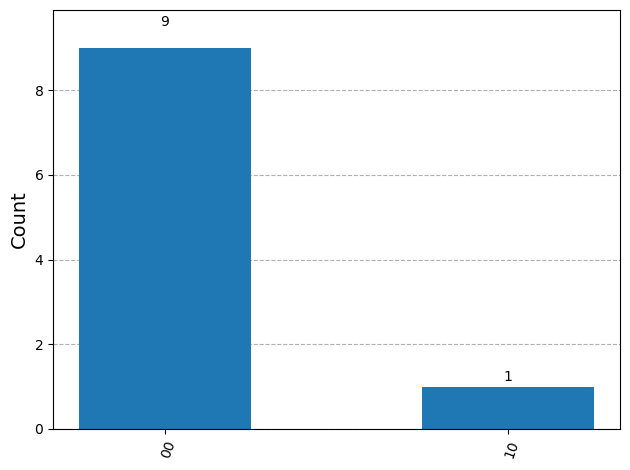

In [2]:
provider = BraketProvider()
backend = provider.get_backend("Ankaa-3")

circuit = QuantumCircuit(2)
circuit.cx(0, 1)

result = backend.run(circuit, shots=10)

plot_histogram(result.result().get_counts())

Our circuit run perfectly fine. Since Rigetti devices don't support CNOT gate natively, we deduce that the circuit was compiled by Braket and our CNOT gate got decomposed into some equivalent sequence of gates.

We will now see what happens if we pass `verbatim=True` and `disable_qubit_rewiring=True` options.


In [3]:
backend.run(circuit, verbatim=True, disable_qubit_rewiring=True)

ValidationException: An error occurred (ValidationException) when calling the CreateQuantumTask operation: [line 5] In verbatim, native gates are required. cnot is not a device native gate.

As expected, we obtained a `ValidationException`. As a last step, let us verify that running circuit with native gates and matching topology is possible.


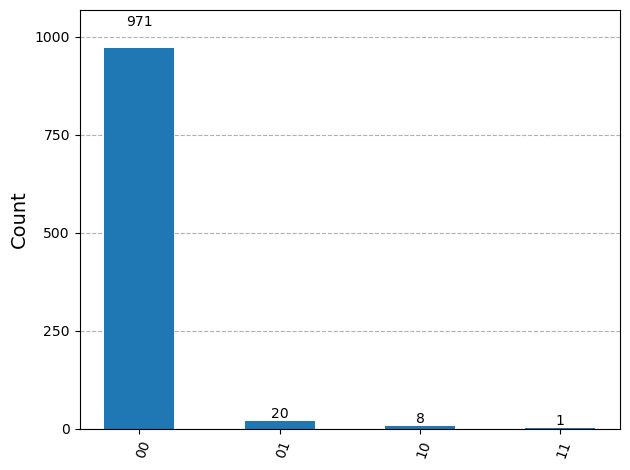

In [4]:
native_circuit = QuantumCircuit(2)
native_circuit.iswap(0, 1)

result = backend.run(native_circuit, verbatim=True, disable_qubit_rewiring=True).result()
plot_histogram(result.get_counts())